---

# **Import Libraries**

In [79]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Time series analysis
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

# Miscellaneous
import datetime as dt
from dateutil.relativedelta import relativedelta
import itertools

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---

# **Business Understanding**

### 🎯 Tujuan Proyek
Melakukan analisis dan prediksi jumlah wisatawan nusantara di berbagai provinsi Indonesia dengan membangun model time series menggunakan metode SARIMA dan Prophet.

### 🏖️ Konteks Bisnis

#### Problem Statement
- **Challenge**: Kesulitan dalam perencanaan kapasitas dan alokasi sumber daya pariwisata
- **Impact**: Ketidakseimbangan antara demand dan supply fasilitas wisata
- **Opportunity**: Optimasi planning dengan prediksi yang akurat

#### Business Objectives
1. **Memahami pola kunjungan** wisatawan domestik di provinsi-provinsi Indonesia
2. **Memprediksi jumlah wisatawan** untuk perencanaan fasilitas dan layanan pariwisata  
3. **Mengidentifikasi tren dan pola musiman** dalam kunjungan wisatawan
4. **Membandingkan performa model** SARIMA dan Prophet untuk kasus ini

### 📊 Stakeholders

| Stakeholder | Kepentingan | Manfaat |
|-------------|-------------|---------|
| **Kemenparekraf** | Policy planning & budget allocation | Alokasi anggaran promosi yang tepat sasaran |
| **Pemda Provinsi** | Regional tourism development | Perencanaan infrastruktur dan event wisata |
| **Hotel & Resort** | Capacity planning & pricing | Revenue optimization dan inventory management |
| **Maskapai & Travel** | Route planning & scheduling | Fleet allocation dan dynamic pricing |

### 🎯 Success Metrics

#### Model Performance
- **Target MAPE**: < 20% (Good performance)
- **Baseline**: Industry standard 20-30% untuk tourism forecasting
- **Current Achievement**: Prophet 20.58%, SARIMA 21.88%

#### Business Impact
- **Akurasi prediksi** untuk planning 6-12 bulan ke depan
- **Identifikasi peak season** untuk capacity scaling
- **Regional insights** untuk targeted marketing
- **ROI improvement** melalui better resource allocation

### 📈 Expected Outcomes

#### Immediate Benefits
1. **Accurate forecasting** jumlah wisatawan bulanan per provinsi
2. **Seasonal pattern identification** untuk strategic planning
3. **Model comparison** untuk selecting best approach
4. **Data-driven insights** untuk policy making

#### Long-term Value
- **Improved tourism revenue** melalui better planning
- **Enhanced visitor experience** dengan adequate facilities
- **Competitive advantage** dalam regional tourism
- **Sustainable tourism development** dengan predictive analytics

---

# **Data Understanding**

In [80]:
df = pd.read_csv('DataWisatawanNusantara.csv', sep=';')
df

,Unnamed: 0,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Apr-24,May-24,Jun-24,Jul-24,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24
0,ACEH,562191,528010,623335,465265,960222,629751,822982,573941,547574,555653,511802,703231,717217,552783,598842,772003,807976,713394,911767,636139,588953,609838,649208,746349,1081919,988563,977399,1312395,1056737,1121373,1011238,964321,1181744,1089633,1064882,1721624
1,SUMATERA UTARA,1921778,1580717,1764578,1402279,2819981,1884772,2121973,1627724,1597977,1709202,1463419,1997896,2579356,1755426,1728767,2429645,2299900,2281863,2373862,1868291,1812580,1935072,1859867,2387174,3934845,3404211,3151675,3460417,3441857,3372608,3408206,3372536,3907777,3338507,3282438,4169674
2,SUMATERA BARAT,792274,721391,911697,612294,1291773,897078,1035751,829404,806251,881965,807606,1162684,1144057,928742,968659,1078994,1179900,1172495,1227983,1010552,1009265,1042337,894678,1165678,1626935,1610621,1266491,1420310,1280094,1529458,1608782,1405802,1486716,1427075,1416489,1752083
3,RIAU,706169,603025,696378,701020,1098858,716953,839437,676466,705930,710646,663521,966008,1049070,754324,771198,1135378,1045392,1029000,1138660,932629,894379,950202,816422,1041078,1735350,1587588,1496958,2080509,1568369,1552621,1583629,1500973,1656622,1517565,1440675,1780158
4,JAMBI,310782,269672,306463,304722,505035,324279,372598,281997,281449,288558,265456,380994,412204,288412,296982,434081,441147,436567,467650,383816,368758,385164,360892,429945,741052,675155,649798,954987,704969,719358,705689,683340,771634,767808,751904,998556
5,SUMATERA SELATAN,656735,523427,659864,562650,935769,668155,787356,635681,634905,641659,572451,809954,890809,682420,681584,852145,910699,943718,1058340,885872,866837,904719,827240,915242,1580053,1398899,1350139,1869157,1438593,1470817,1449100,1438726,1639793,1635045,1587669,2062915
6,BENGKULU,163243,131747,163494,137489,275055,166987,185468,147782,149412,149350,132822,186149,202639,152573,157805,232020,213621,214889,237589,188991,184005,192386,193018,210448,369567,324525,309839,476760,353140,372200,388032,357207,389084,366633,363291,622945
7,LAMPUNG,868569,692881,885918,694637,1294496,914577,1047723,814068,857764,851252,798329,1025363,1150037,943668,909180,1175047,1232696,1227576,1328185,1101053,1095330,1131906,949429,1203553,1713476,1469073,1392326,1729965,1608538,1710187,1546462,1435569,1576863,1539987,1518834,1993026
8,KEP. BANGKA BELITUNG,112963,97970,133170,124013,176363,140588,153840,119951,123869,131100,116140,156033,167336,123754,134009,145833,178569,185921,214356,163500,172019,175878,153019,177339,268354,246245,237090,314904,256159,247359,268651,236385,298223,270903,268737,411036
9,KEP. RIAU,54795,49101,60465,64630,80928,70786,71686,58503,59115,61365,61677,89134,70945,57923,62364,74387,86303,91226,103446,84011,79166,89935,86009,82727,275085,273861,266969,374769,267945,241744,264805,233950,280282,256292,250760,313316


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  38 non-null     object
 1   Jan-22      38 non-null     object
 2   Feb-22      38 non-null     object
 3   Mar-22      38 non-null     object
 4   Apr-22      38 non-null     object
 5   May-22      38 non-null     object
 6   Jun-22      38 non-null     object
 7   Jul-22      38 non-null     object
 8   Aug-22      38 non-null     object
 9   Sep-22      38 non-null     object
 10  Oct-22      38 non-null     object
 11  Nov-22      38 non-null     object
 12  Dec-22      38 non-null     object
 13  Jan-23      38 non-null     object
 14  Feb-23      38 non-null     object
 15  Mar-23      38 non-null     object
 16  Apr-23      38 non-null     object
 17  May-23      38 non-null     object
 18  Jun-23      38 non-null     object
 19  Jul-23      38 non-null     object
 20  Aug-23      

In [82]:
df.describe()

,Jan-24,Feb-24,Mar-24,Apr-24,May-24,Jun-24,Jul-24,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24
count,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01
mean,2.381623e+06,2.134399e+06,2.077800e+06,2.750716e+06,2.181833e+06,2.196639e+06,2.032734e+06,1.996796e+06,2.193715e+06,2.142866e+06,2.121383e+06,2.660129e+06
std,4.245405e+06,3.827256e+06,3.696270e+06,5.090095e+06,3.923300e+06,4.017836e+06,3.576107e+06,3.460002e+06,3.782361e+06,3.774781e+06,3.774072e+06,4.540162e+06
min,2.909500e+04,2.138100e+04,2.139700e+04,2.463400e+04,2.019100e+04,1.380900e+04,1.659500e+04,1.286800e+04,1.277200e+04,1.200000e+04,1.212900e+04,2.810800e+04
25%,2.700368e+05,2.531490e+05,2.445598e+05,3.298702e+05,2.591055e+05,2.431478e+05,2.657665e+05,2.345588e+05,2.827152e+05,2.599448e+05,2.538025e+05,3.285085e+05
50%,8.280425e+05,7.382830e+05,7.223380e+05,1.000661e+06,7.457285e+05,7.429895e+05,7.319770e+05,6.765255e+05,7.615120e+05,7.331405e+05,7.195595e+05,9.842890e+05
75%,1.729882e+06,1.604863e+06,1.470800e+06,2.027671e+06,1.598496e+06,1.666316e+06,1.602494e+06,1.485411e+06,1.652415e+06,1.611280e+06,1.570460e+06,1.991570e+06
max,1.833181e+07,1.751869e+07,1.596342e+07,2.235086e+07,1.752880e+07,1.896227e+07,1.625585e+07,1.393134e+07,1.570090e+07,1.528823e+07,1.542826e+07,1.882563e+07


### **Interpretasi Dataset Wisatawan Nusantara**

📊 **Overview Dataset**

Dataset: DataWisatawanNusantara.csv  
Periode: Januari 2022 - Desember 2024 (3 tahun)  
Cakupan: 38 Provinsi di Indonesia  

🔍 **Struktur Data**

Dimensi Data:
- Rows: 38 entries (38 provinsi Indonesia)
- Columns: 37 kolom (1 nama provinsi + 36 bulan data)
- Time Range: Jan 2022 - Dec 2024 (36 bulan)

⚠️ **Issue Data Quality**

Problem Tipe Data:
- 2022-2023: Kolom bertipe `object` (bukan numeric)
- 2024: Kolom bertipe `int64` (sudah numeric)

Penyebab:
1. Missing values di 2022-2023 menggunakan simbol `-`
2. Provinsi baru (Papua Tengah, Papua Pegunungan, Papua Selatan) belum ada data lengkap
3. Inconsistent format antara tahun berbeda

🛠️ **Langkah Cleaning**

Data Preprocessing:
1. Replace simbol `-` dengan angka `0`
2. Convert semua kolom ke tipe `numeric`
3. Handle missing values untuk provinsi baru
4. Transpose data untuk format time series

---

# **DATA PREPROCESSING**

Membuat salinan (copy) dari dataframe asli df ke variabel baru df_processed untuk preservasi data original sebelum dilakukan preprocessing.

In [83]:
df_processed = df.copy()

Mengubah nama kolom pertama (yang berisi nama-nama provinsi) menjadi 'Province' untuk standarisasi dan kemudahan akses data.

In [84]:
df_processed.rename(columns={df_processed.columns[0]: 'Province'}, inplace=True)

Membersihkan data dengan mengganti simbol '-' menjadi 0 dan mengkonversi semua kolom data (kecuali kolom pertama) ke tipe numerik untuk persiapan analisis time series.

In [85]:
for col in df_processed.columns[1:]:
    df_processed[col] = df_processed[col].replace('-', 0)
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

Null values berhasil diatasi dengan mengganti simbol '-' menjadi 0

In [86]:
df_processed.tail()

,Province,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23,Mar-23,Apr-23,May-23,Jun-23,Jul-23,Aug-23,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Apr-24,May-24,Jun-24,Jul-24,Aug-24,Sep-24,Oct-24,Nov-24,Dec-24
33,PAPUA BARAT DAYA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94110,79853,78934,88878,75900,63650,69125,57552,72966,74810,75414,139471
34,PAPUA,80163,68008,86884,82002,88488,91248,93086,81208,80230,85552,84145,131877,108995,85636,92736,87401,113058,135753,139729,125694,113056,129893,134785,119193,148142,122325,121433,129388,109262,92173,99729,86367,93375,89653,85657,217194
35,PAPUA SELATAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29095,21381,21397,24634,20191,13809,16595,12868,12772,12000,12129,28108
36,PAPUA TENGAH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65881,50891,53025,56119,48206,32264,43680,36162,45070,42482,43703,85629
37,PAPUA PEGUNUNGAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41242,40052,36071,33908,31517,25128,28190,27036,43481,43818,43983,86864


Membuat fungsi untuk mengkonversi nama kolom dengan format 'Mon-YY' (seperti 'Jan-22') menjadi timestamp yang valid. Proses ini mengubah string seperti 'Jan-22' menjadi date object 2022-01-01 untuk membuat index waktu yang proper pada time series analysis.

In [87]:
# Create date columns from column names
date_columns = df_processed.columns[1:].tolist()

# Parse dates - assuming format is 'Mon-YY'
def parse_date_column(col_name):
    try:
        # Handle format like 'Jan-22', 'Feb-22', etc.
        month_year = col_name.split('-')
        month_name = month_year[0]
        year = int('20' + month_year[1])  # Convert 22 to 2022
        
        month_dict = {
            'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
            'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
            'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
        }
        
        month = month_dict[month_name]
        return pd.Timestamp(year=year, month=month, day=1)
    except:
        return None

# Create date index
dates = [parse_date_column(col) for col in date_columns]
valid_dates = [d for d in dates if d is not None]

print(f"Date parsing:")
print(f"Date range: {min(valid_dates)} to {max(valid_dates)}")
print(f"Total periods: {len(valid_dates)}")

Date parsing:
Date range: 2022-01-01 00:00:00 to 2024-12-01 00:00:00
Total periods: 36


Melakukan transpose dataframe dengan menjadikan kolom 'Province' sebagai index, sehingga struktur data berubah dari format wide (provinsi sebagai baris, bulan sebagai kolom) menjadi format long (bulan sebagai baris, provinsi sebagai kolom) yang sesuai untuk analisis time series.

In [88]:
df_transposed = df_processed.set_index('Province').T

Mengatur index datetime yang proper pada dataframe yang sudah di-transpose menggunakan valid_dates yang telah diparsing sebelumnya. Hasilnya adalah dataframe dengan 36 periode waktu (Januari 2022 - Desember 2024) dan 38 kolom provinsi yang siap untuk analisis time series.

In [89]:
# Set proper datetime index
df_transposed.index = valid_dates[:len(df_transposed)]
df_transposed.index.name = 'Date'
print(f"   New shape: {df_transposed.shape}")

   New shape: (36, 38)


In [90]:
df_transposed.head()

Province,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,DKI JAKARTA,JAWA BARAT,JAWA TENGAH,DI YOGYAKARTA,JAWA TIMUR,BANTEN,BALI,NUSA TENGGARA BARAT,NUSA TENGGARA TIMUR,KALIMANTAN BARAT,KALIMANTAN TENGAH,KALIMANTAN SELATAN,KALIMANTAN TIMUR,KALIMANTAN UTARA,SULAWESI UTARA,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA BARAT DAYA,PAPUA,PAPUA SELATAN,PAPUA TENGAH,PAPUA PEGUNUNGAN
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,562191,1921778,792274,706169,310782,656735,163243,868569,112963,54795,4457637,9579695,13141225,2536501,18971646,3361868,774705,281297,478188,253330,177944,431753,300255,24693,327714,170253,903014,240598,119886,84410,44434,53558,40172,0,80163,0,0,0
2022-02-01,528010,1580717,721391,603025,269672,523427,131747,692881,97970,49101,3606091,7195015,12106995,2308081,18942506,2610413,647912,234836,266562,225840,156658,381757,249201,21363,258312,148593,794867,209500,99569,76541,37554,48723,33495,0,68008,0,0,0
2022-03-01,623335,1764578,911697,696378,306463,659864,163494,885918,133170,60465,5310074,10917156,14595597,2744782,26811651,4037633,1055487,364150,417558,229040,191332,472408,319869,25803,401034,535479,3288187,1568582,149064,321429,50342,91544,37967,0,86884,0,0,0
2022-04-01,465265,1402279,612294,701020,304722,562650,137489,694637,124013,64630,4708491,8896964,4577549,881378,11586727,3713837,957146,287637,198893,220150,189629,354782,305980,26923,422015,632773,3558655,1861497,132243,372456,50235,100055,35957,0,82002,0,0,0
2022-05-01,960222,2819981,1291773,1098858,505035,935769,275055,1294496,176363,80928,6398667,14805925,9631807,1575785,19684793,5272084,990167,434426,246500,358559,245945,650362,479349,29297,577681,742532,4281783,2067525,192939,429632,53675,113337,39045,0,88488,0,0,0


---

# EXPLORATORY DATA ANALYSIS

Menghitung total jumlah wisatawan nusantara per bulan di seluruh Indonesia dengan menjumlahkan data dari ke-38 provinsi. Kolom baru 'Total_Indonesia' ini akan digunakan sebagai target variable untuk modeling SARIMA dan Prophet dalam memprediksi tren wisatawan nasional.

In [91]:
# Calculate total tourists per month across all provinces
df_transposed['Total_Indonesia'] = df_transposed.sum(axis=1)

Menampilkan statistik deskriptif untuk total wisatawan nusantara bulanan di Indonesia. Data menunjukkan rata-rata 71,7 juta wisatawan per bulan dengan volatilitas cukup tinggi (standar deviasi 13,2 juta), range dari 49,2 juta (minimum) hingga 104,5 juta (maksimum) yang mencerminkan dampak COVID-19 dan recovery pariwisata domestik.

In [92]:
print("📊 SUMMARY STATISTICS:")
print(f"Average monthly tourists (Indonesia): {df_transposed['Total_Indonesia'].mean():,.0f}")
print(f"Maximum monthly tourists: {df_transposed['Total_Indonesia'].max():,.0f}")
print(f"Minimum monthly tourists: {df_transposed['Total_Indonesia'].min():,.0f}")
print(f"Standard deviation: {df_transposed['Total_Indonesia'].std():,.0f}")
print()

📊 SUMMARY STATISTICS:
Average monthly tourists (Indonesia): 71,715,167
Maximum monthly tourists: 104,527,211
Minimum monthly tourists: 49,222,973
Standard deviation: 13,236,604



Ranking provinsi berdasarkan rata-rata wisatawan nusantara bulanan menunjukkan dominasi Pulau Jawa yang menguasai 5 posisi teratas dengan Jawa Timur memimpin (16,9 juta/bulan). Menariknya, Bali yang terkenal sebagai destinasi wisata hanya berada di posisi ke-9 dengan 1,4 juta wisatawan domestik per bulan, menunjukkan bahwa wisatawan nusantara lebih memilih destinasi lokal di pulau mereka.

In [93]:
print("🏆 TOP 10 PROVINCES BY AVERAGE MONTHLY TOURISTS:")
province_avg = df_transposed.drop('Total_Indonesia', axis=1).mean().sort_values(ascending=False)
for i, (province, avg_tourists) in enumerate(province_avg.head(10).items(), 1):
    print(f"{i:2d}. {province:<20}: {avg_tourists:>10,.0f}")
print()


🏆 TOP 10 PROVINCES BY AVERAGE MONTHLY TOURISTS:
 1. JAWA TIMUR          : 16,902,626
 2. JAWA BARAT          : 13,060,249
 3. JAWA TENGAH         :  9,726,475
 4. DKI JAKARTA         :  6,112,957
 5. BANTEN              :  4,581,344
 6. SULAWESI SELATAN    :  2,589,985
 7. SUMATERA UTARA      :  2,484,690
 8. DI YOGYAKARTA       :  1,950,835
 9. BALI                :  1,421,343
10. LAMPUNG             :  1,206,321



Dari grafik "Total Monthly Tourists in Indonesia (2022-2024)" terlihat adanya tren kenaikan jumlah wisatawan yang berkunjung ke Indonesia dalam periode tiga tahun tersebut. Meskipun terdapat beberapa fluktuasi sepanjang tahun 2022 hingga pertengahan 2023, grafik menunjukkan peningkatan signifikan mulai awal 2024 dengan puncak jumlah turis mencapai lebih dari 1 × 10⁸ pengunjung. Trend positif ini mengindikasikan pemulihan sektor pariwisata Indonesia yang semakin kuat setelah periode pandemi, dengan angka kunjungan yang terus meningkat hingga pertengahan tahun 2024.

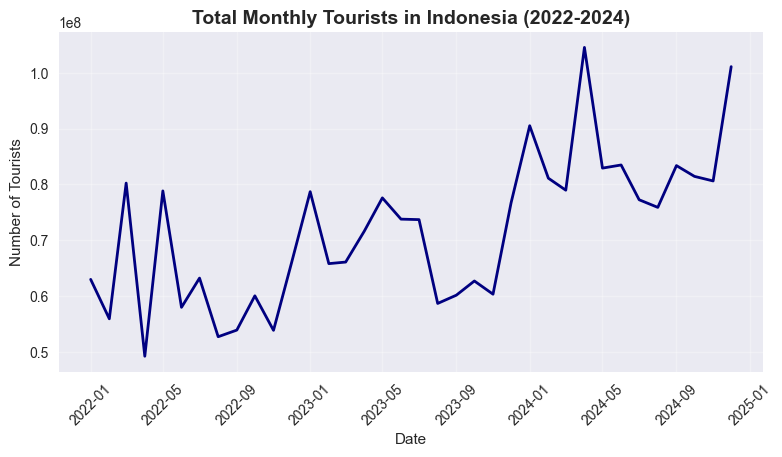

In [94]:
plt.figure(figsize=(20, 15))

# 1. Overall trend for Indonesia
plt.subplot(3, 2, 1)
plt.plot(df_transposed.index, df_transposed['Total_Indonesia'], linewidth=2, color='navy')
plt.title('Total Monthly Tourists in Indonesia (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Tourists')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)


Grafik "Top 5 Provinces - Monthly Tourists Trend" menampilkan perbandingan jumlah wisatawan bulanan di lima provinsi teratas di Indonesia selama periode 2022-2025. Jawa Timur konsisten mendominasi sebagai destinasi wisata terpopuler dengan jumlah kunjungan tertinggi mencapai puncaknya sekitar 2.7 × 10⁷ wisatawan pada awal 2022, diikuti oleh Jawa Barat di posisi kedua yang menunjukkan tren kenaikan signifikan menjelang 2025. Ketiga provinsi lainnya (Jawa Tengah, DKI Jakarta, dan Banten) juga menunjukkan pola pertumbuhan positif meskipun dengan angka kunjungan yang lebih rendah, dengan semua provinsi menunjukkan tren kenaikan yang serupa menjelang awal 2025.

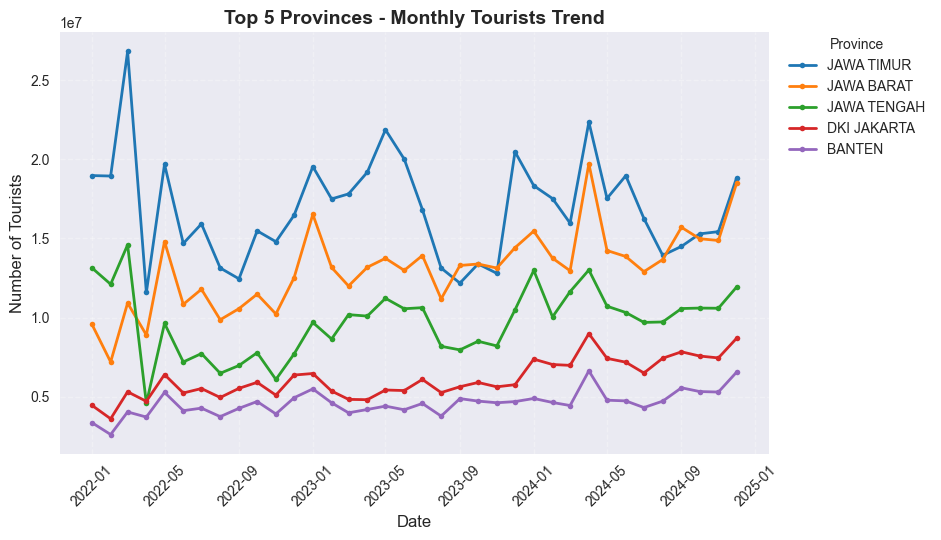

In [95]:
# Ambil 5 provinsi teratas berdasarkan rata-rata turis
top_5_provinces = province_avg.head(5).index

# Palet warna agar tidak semua garis biru
colors = plt.cm.tab10.colors  # Atau ganti dengan plt.cm.Set2.colors

# Plot tren masing-masing provinsi
for i, province in enumerate(top_5_provinces):
    plt.plot(df_transposed.index, df_transposed[province],
             label=province,
             linewidth=2,
             color=colors[i % len(colors)],
             marker='o',
             markersize=4)

# Tambahan formatting
plt.title('Top 5 Provinces - Monthly Tourists Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tourists', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Legend lebih rapi
plt.legend(title='Province', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

Grafik "Average Monthly Tourists by Month (Seasonality)" menunjukkan pola musiman kunjungan wisatawan ke Indonesia berdasarkan rata-rata bulanan. Pada grafik tersebut terlihat bahwa peak season pariwisata Indonesia terjadi pada bulan Desember dan Mei dengan jumlah rata-rata wisatawan mencapai sekitar 8 × 10⁷ pengunjung, diikuti oleh Januari yang juga menunjukkan angka kunjungan tinggi. Sementara itu, low season terjadi pada bulan Agustus dan September dengan jumlah wisatawan di bawah 7 × 10⁷, mengindikasikan bahwa musim liburan akhir tahun dan pertengahan tahun merupakan periode favorit bagi wisatawan untuk berkunjung ke Indonesia.

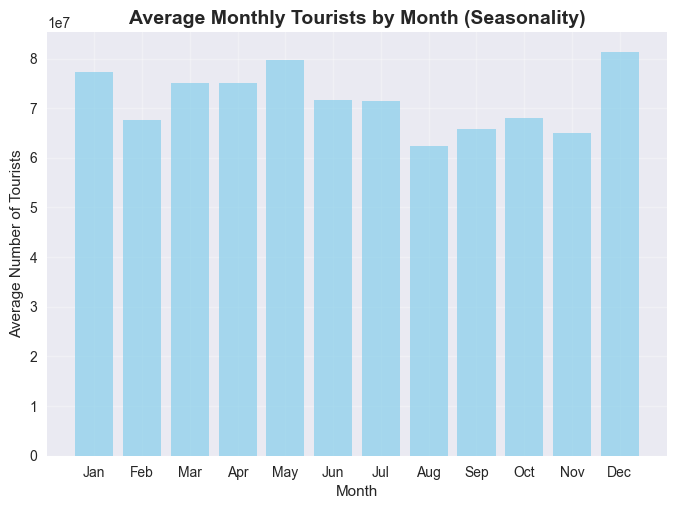

In [96]:
# 3. Seasonal pattern (monthly average)
monthly_avg = df_transposed.groupby(df_transposed.index.month)['Total_Indonesia'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), monthly_avg, color='skyblue', alpha=0.7)
plt.title('Average Monthly Tourists by Month (Seasonality)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Number of Tourists')
plt.xticks(range(1, 13), month_names)
plt.grid(True, alpha=0.3)

Grafik "Total Annual Tourists by Year" memperlihatkan peningkatan konsisten jumlah kunjungan wisatawan ke Indonesia dari tahun 2022 hingga 2024. Terjadi pertumbuhan signifikan dari 734,864,693 pengunjung pada 2022 menjadi 825,797,301 pengunjung di 2023 (peningkatan sekitar 12.4%), yang kemudian berlanjut dengan lonjakan lebih besar ke angka 1,021,084,031 pengunjung pada tahun 2024 (peningkatan sekitar 23.6%). Data ini menunjukkan recovery yang kuat pada sektor pariwisata Indonesia dengan total pertumbuhan sekitar 39% dalam periode tiga tahun, yang mencerminkan efektivitas strategi promosi tourism dan pengaruh positif dari stabilisasi situasi global pasca-pandemi.

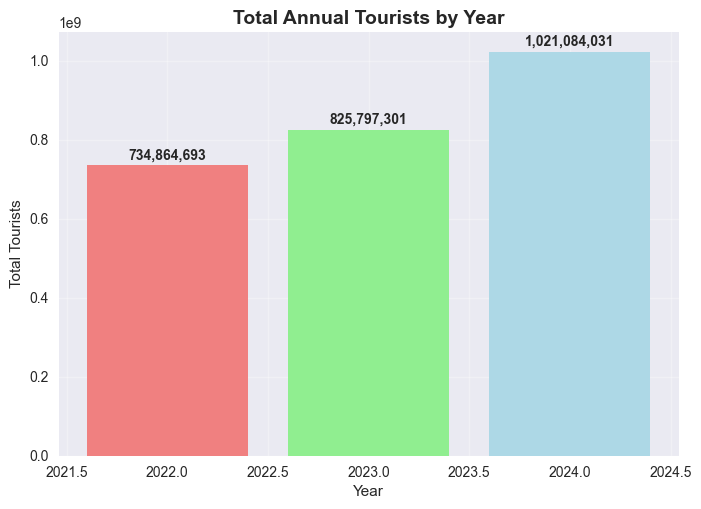

In [97]:
# 4. Year-over-year comparison
yearly_data = df_transposed.groupby(df_transposed.index.year)['Total_Indonesia'].sum()
colors = ['lightcoral', 'lightgreen', 'lightblue']
bars = plt.bar(yearly_data.index, yearly_data.values, color=colors)
plt.title('Total Annual Tourists by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, yearly_data.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01,
             f'{value:,.0f}', ha='center', va='bottom', fontweight='bold')

Copilot said: Grafik "Total Tourists by Province (2022-2024)" mengilustrasikan
Grafik "Total Tourists by Province (2022-2024)" mengilustrasikan distribusi kunjungan wisatawan di seluruh provinsi Indonesia selama periode tiga tahun. Jawa Timur mendominasi sebagai provinsi paling populer dengan jumlah pengunjung hampir mencapai 6 × 10⁸ wisatawan, diikuti oleh Jawa Barat dan Jawa Tengah yang juga menunjukkan angka kunjungan yang tinggi. Terlihat adanya kesenjangan yang signifikan antara provinsi-provinsi di Pulau Jawa dengan provinsi lainnya, khususnya provinsi di kawasan timur Indonesia seperti Papua yang mencatat jumlah kunjungan terendah. Data ini mencerminkan ketidakseimbangan dalam pembangunan infrastruktur pariwisata dan konektivitas antar wilayah di Indonesia.

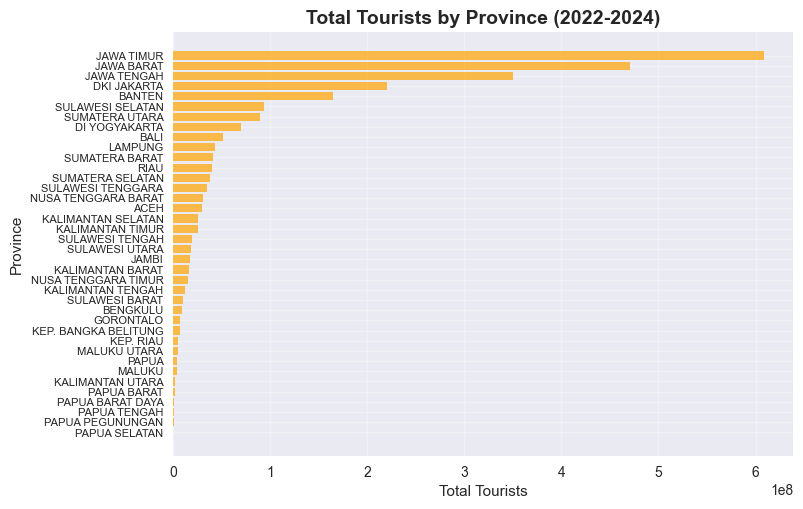

In [98]:
# 5. Distribution of tourists across provinces
province_totals = df_transposed.drop('Total_Indonesia', axis=1).sum().sort_values(ascending=True)
plt.barh(range(len(province_totals)), province_totals.values, color='orange', alpha=0.7)
plt.title('Total Tourists by Province (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Total Tourists')
plt.ylabel('Province')
plt.yticks(range(len(province_totals)), province_totals.index, fontsize=8)
plt.grid(True, alpha=0.3)

Grafik "Indonesia Tourism Trend with Rolling Average" menyajikan perbandingan antara data bulanan dan rolling average tiga bulan untuk jumlah wisatawan di Indonesia dari 2022 hingga awal 2025. Rolling average (garis coklat) memperlihatkan trend jangka panjang yang lebih jelas dibandingkan fluktuasi data bulanan (garis merah muda), dengan tiga fase pertumbuhan yang teridentifikasi: awal 2022 hingga pertengahan 2022 yang relatif flat, pertengahan 2022 hingga akhir 2023 yang menunjukkan pertumbuhan moderat, dan fase akselerasi pertumbuhan signifikan sepanjang 2024. Secara keseluruhan, grafik mengkonfirmasi tren positif sektor pariwisata Indonesia yang konsisten naik dengan beberapa fluktuasi musiman, dan mencapai puncaknya mendekati 1 × 10⁸ wisatawan pada akhir periode analisis.